In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pandas import Timestamp
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sympy import *
from scipy.optimize import fsolve
from itertools import combinations
pd.set_option('display.max_rows', None)
plt.rcParams["figure.figsize"] = 15, 6

In [2]:
def logarithm_a(number):
    s = [Q_list[k] * np.log((delta[number + 1] - delta_mod[k]) / (delta[number + 1] - delta_mod[k + 1])) for k in
         range(less(number))]
    return sum(s)

In [3]:
def logarithm_b(band, number):
    s = [b_list[j]/(4*np.pi) * Q[k] * np.log((delta[number + 1] - delta[k]) / (delta[number + 1] - delta[k + 1])) 
         for j in range(band)
         for k in range(list_change[j], list_change[j + 1])]
    return sum(s)

In [4]:
def logarithm_c(band, number):
    s = [Q[k] * np.log((delta[number + 1] - delta[k]) / (delta[number + 1] - delta[k + 1])) 
         for k in range(list_change[band], number)]
    return sum(s)

In [7]:
def less(val):
    for x in delta_mod:
        if val < x:
            return delta_mod.index(x) - 1

In [414]:
def solution_a(list_num):
    a = Symbol('a')
    b = Symbol('b')
    w = Symbol('w')
    equation = [a - b/(4*np.pi) * (logarithm_a(i - 1) + Q[i - 1] * log(w) + Q[i - 1] * 
                           np.log(2.25 * 86400 * (delta[i] - delta_mod[less(i - 1)]))) - p[i]
        for i in list_num]
    solved_value = solve([equation[0], equation[1], equation[2]], [a, b, log(w)])
    print(solved_value)
    if solved_value:
        return solved_value[0]

In [10]:
def solution_c(list_num, band):
    b = Symbol('b')
    w = Symbol('w')
    
    equation = [a - logarithm_b(band, i - 1) - b/(4*np.pi) * 
                (logarithm_c(band, i - 1) + Q[i - 1] * log(w) + Q[i - 1] * np.log(2.25 * 86400 * (delta[i] - delta[i - 1]))) - p[i]
        for i in list_num]
    solved_value = solve([equation[0], equation[1]], [b, log(w)])
    if solved_value:
        return solved_value[0]

In [11]:
def standard(df):
    df_scaled = StandardScaler().fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled)
    return df_scaled

In [507]:
def plots(df_solution):
    for i in range(df_solution.shape[1]):
        plt.scatter(range(df_solution.shape[0]),
                df_solution.iloc[:, i], s=10)
        plt.grid()
        plt.show()

In [763]:
df_full = pd.read_excel('D:\Python\DBscan\Two.xlsx', sheet_name='5 (P1-2)', index_col=0)
df = df_full.iloc[:, 1:]

In [787]:
p = df['Рзаб замер']

Qж = np.array(df['Qж, м3/сут'])
Qн = np.array(df['Qн, т/сут'])
Qг = np.array(df['Qгаз, м3/сут'])
GF = np.array(df['ГФ, м3/т'])
Qв = Qж - Qн
Qгп = np.divide((Qг - Qн * 194), p)
Qгп[Qгп < 0] = 0
Qнв = np.array(1.3 / 0.85 * Qн + Qв)
Qнвг = np.array(1.3 / 0.85 * Qн + Qв + Qгп)
Q = Qнвг
water = Qв/Qнв
date = df.index.tolist()

df

,"Qж, м3/сут","Qгаз, м3/сут","Обв, %","Qн, т/сут","ГФ, м3/т",Рзаб замер
2018-11-04,91.304,80895.679,0.03,74.9381,1079.500,198.327807
2018-11-05,91.304,80895.679,0.03,74.9381,1079.500,198.302076
2018-11-06,91.304,80895.679,0.03,74.9381,1079.500,198.276345
2018-11-07,91.304,80895.679,0.03,74.9381,1079.500,198.250614
2018-11-08,91.304,80895.679,0.03,74.9381,1079.500,198.224884
2018-11-09,91.304,80895.679,0.03,74.9381,1079.500,198.199153
2018-11-10,91.304,80895.679,0.03,74.9381,1079.500,198.173422
2018-11-11,91.304,80895.679,0.03,74.9381,1079.500,198.147691
2018-11-12,91.304,80895.679,0.03,74.9381,1079.500,198.121960
2018-11-13,91.304,80895.679,0.03,74.9381,1079.500,198.096229


In [688]:
with pd.ExcelWriter('D:\Python\DBscan\Two.xlsx', mode="a", engine="openpyxl", if_sheet_exists="replace") as writer:
    df_full.to_excel(writer, sheet_name='5 (P1-2)')

In [687]:
df_full['Рзаб замер'] = np.array([p[0] - i*(p[0] - 191.998)/len(p) for i in range(len(p))])

In [789]:
N_list = [0]
Q_list = [Q[0]]
Qo = Q[0]
n = 0
while Qo != Q[-1]:
    while Qo == Q[n]:
        n += 1
    Qo = Q[n]
    N_list.append(n)
    Q_list.append(Q[n])

delta = [(date[i] - date[0]).days for i in range(len(date))]
delta_mod = [(date[i] - date[0]).days for i in N_list]

In [795]:
list_combinations = list(combinations(range(1, 11), 3)) 
list_combinations = [list(x) for x in list_combinations]
random.shuffle(list_combinations)
list_solution = []
n = int(input())
N = min(n, len(list_combinations))
print(N)
for j in range(N):
    list_solution.append(solution_a(list_combinations[j]))
list_solution = np.array(list(filter(lambda item: item is not None, list_solution)))

100
100
[(473.200276528181, 1.11652873469084e-5, 664545.793933832)]
[(473.559472888096, 4.52041212125810e-6, 1643573.23915690)]
[(473.628749203585, 3.22898110553972e-6, 2301504.78068081)]
[(473.743995719793, 2.58256038512501e-6, 2878783.98146611)]
[(473.755150879984, 2.30875991103515e-6, 3220316.85796786)]
[(473.806053359760, 1.78578861922741e-6, 4164165.17562107)]
[(473.319729391523, 8.11083314342894e-6, 915209.372221313)]
[(473.353423886439, 7.98955536527997e-6, 929215.786948101)]
[(473.644825174416, 3.73790837108796e-6, 1988262.23670833)]
[(473.436796582542, 7.02271739132065e-6, 1057465.83793098)]
[(473.785289156269, 2.32617785081517e-6, 3196553.19742305)]
[(473.779283046338, 2.50520807031423e-6, 2968051.60825523)]
[(473.542874028458, 5.16480626574824e-6, 1438422.11787011)]
[(473.297285399774, 9.26595270954286e-6, 801049.690948116)]
[(473.299744179214, 9.12731424115655e-6, 813224.636694300)]
[(473.822725110562, 2.18962873255632e-6, 3396358.14156001)]
[(473.149810654785, 1.2305204118

KeyboardInterrupt: 

In [773]:
df_solution = pd.DataFrame(list_solution)

In [774]:
df_solution = df_solution[(df_solution.iloc[:, 0] > 0) & (df_solution.iloc[:, 1] > 0) & (df_solution.iloc[:, 2] != log('w'))]

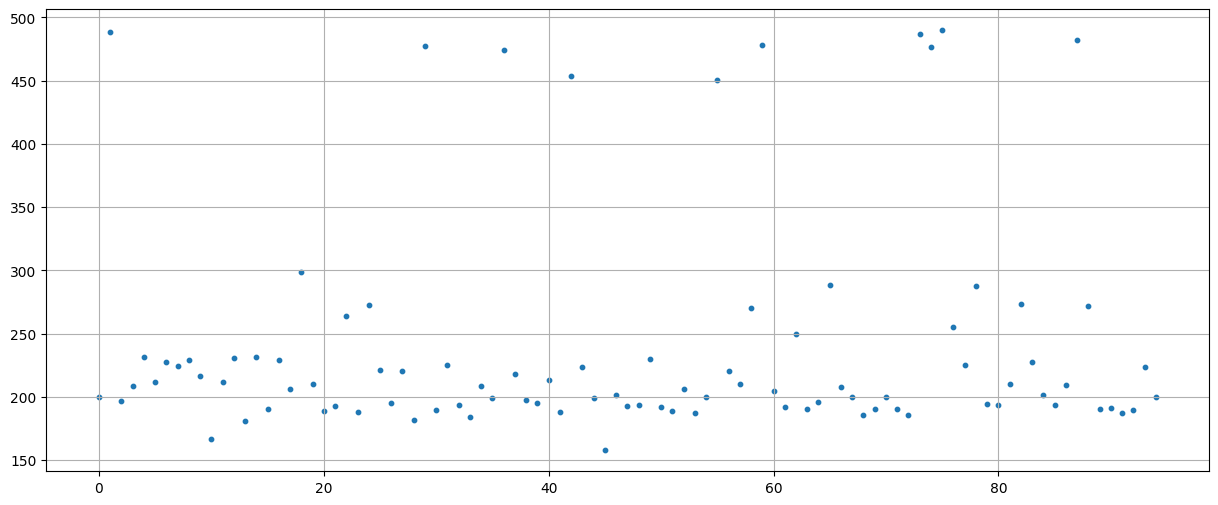

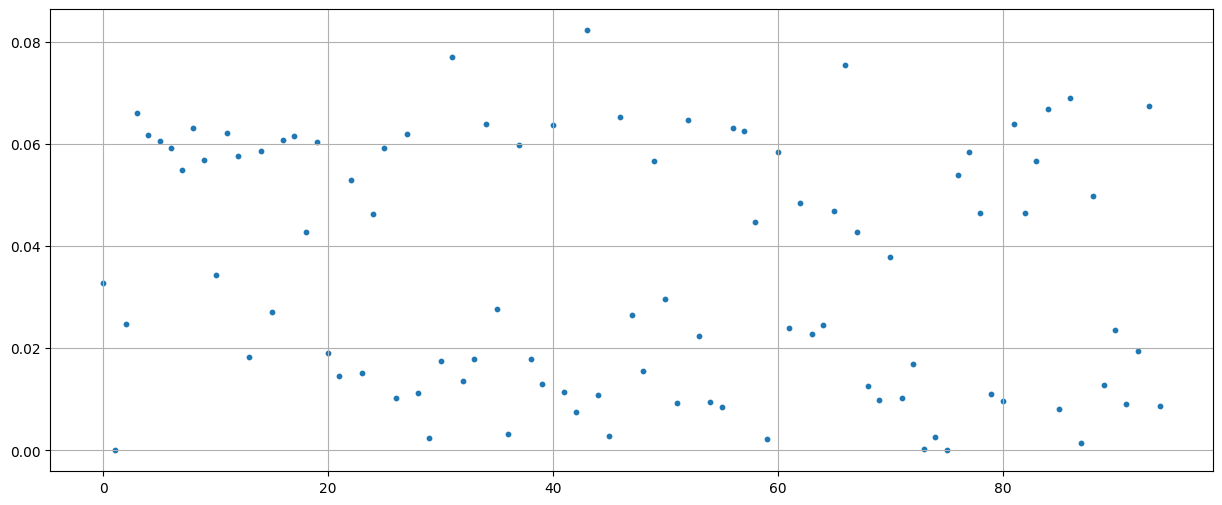

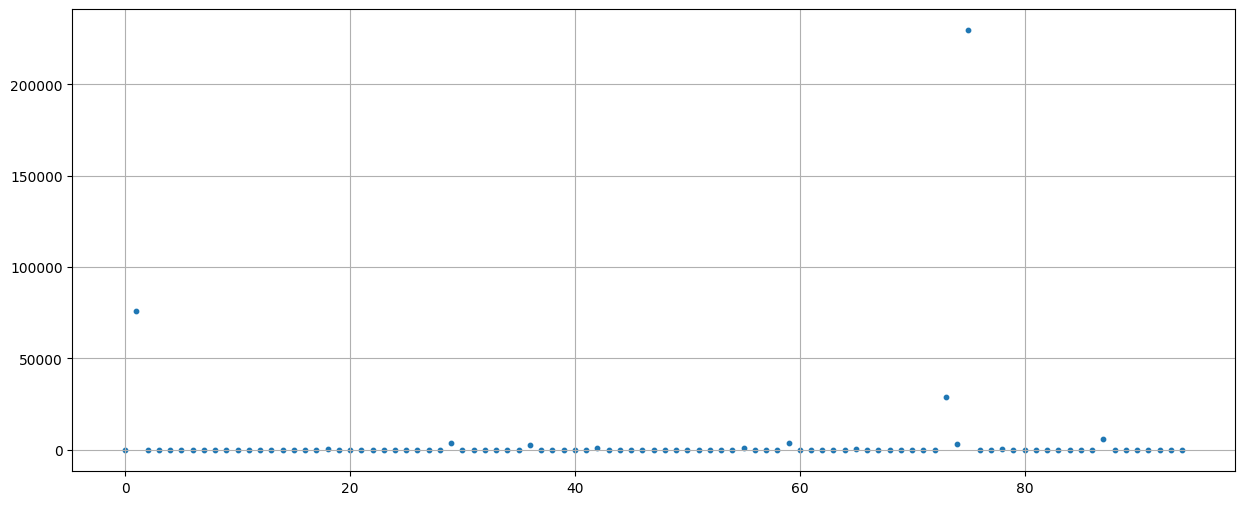

In [775]:
plots(df_solution)

In [776]:
df_solution['Cluster'] = IsolationForest(n_estimators=1000, contamination=0.5).fit_predict(standard(df_solution))
df_solution = df_solution[df_solution['Cluster'] == 1]
df_solution.pop('Cluster')

2     1
3     1
5     1
6     1
7     1
9     1
11    1
15    1
16    1
17    1
19    1
20    1
21    1
23    1
26    1
27    1
28    1
31    1
33    1
35    1
36    1
38    1
39    1
41    1
42    1
43    1
50    1
51    1
53    1
54    1
56    1
59    1
60    1
65    1
67    1
68    1
73    1
76    1
77    1
82    1
84    1
85    1
86    1
88    1
90    1
94    1
95    1
97    1
Name: Cluster, dtype: int32

In [777]:
df_solution.mean()

0    201.822352
1      0.034668
2    -18.083252
dtype: float64

In [785]:
a = 201.822352

In [807]:
change = np.array(pd.cut(df['ГФ, м3/т'], 5).tolist())
list_change = np.hstack([0, np.where(change[:-1] != change[1:])[0] + 1, df.shape[0] - 1])
list_change = [  0,  169, 235]

In [803]:
gf_list = []
for i in range(len(list_change) - 1):
    left = list_change[i]
    right = list_change[i + 1]
    gf_list.append(GF[left:right].mean())
gf_list

[954.6348994082841, 1589.752]

In [804]:
qн_list = []
for i in range(len(list_change) - 1):
    left = list_change[i]
    right = list_change[i + 1]
    qн_list.append(Qнв[left:right].mean())

[189.65551893491124, 90.94836470588235]

In [805]:
q_list = []
for i in range(len(list_change) - 1):
    left = list_change[i]
    right = list_change[i + 1]
    q_list.append(Q[left:right].mean())

[616.0716284635853, 467.4675614505226]

100


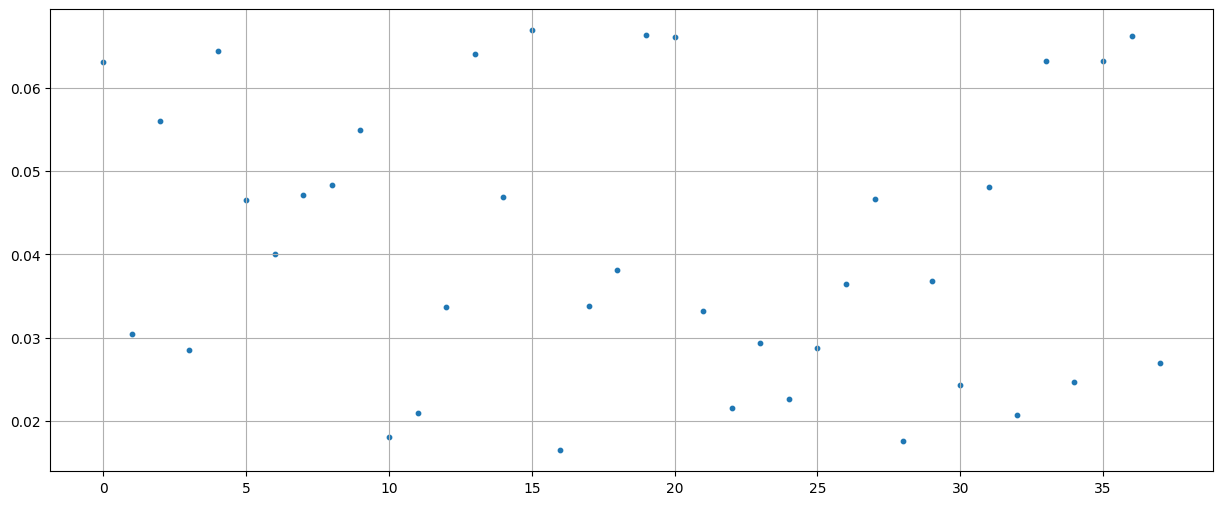

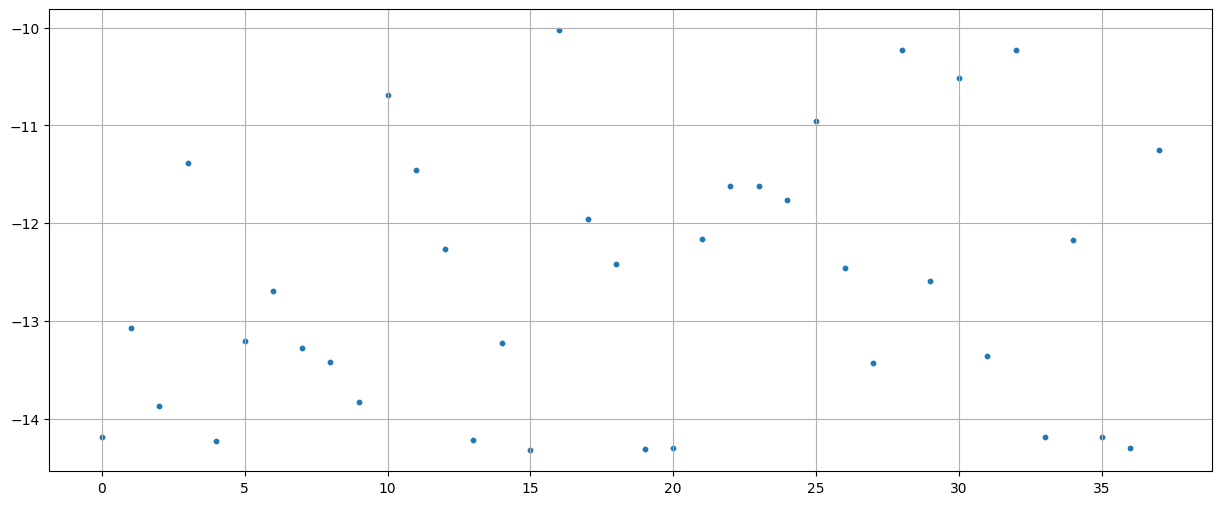

0.04107576661265698 -12.615407892207127
100


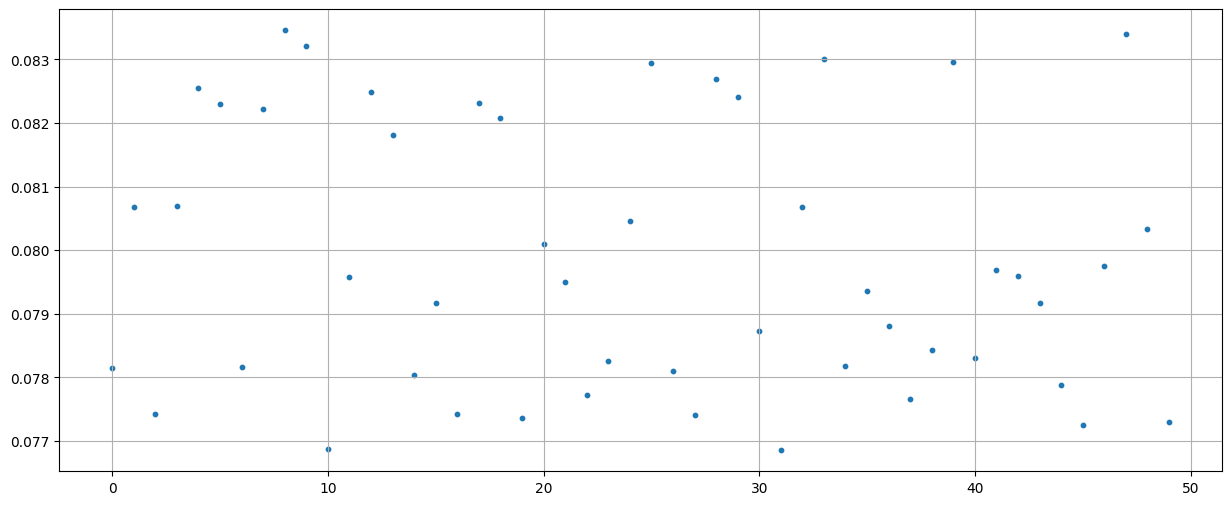

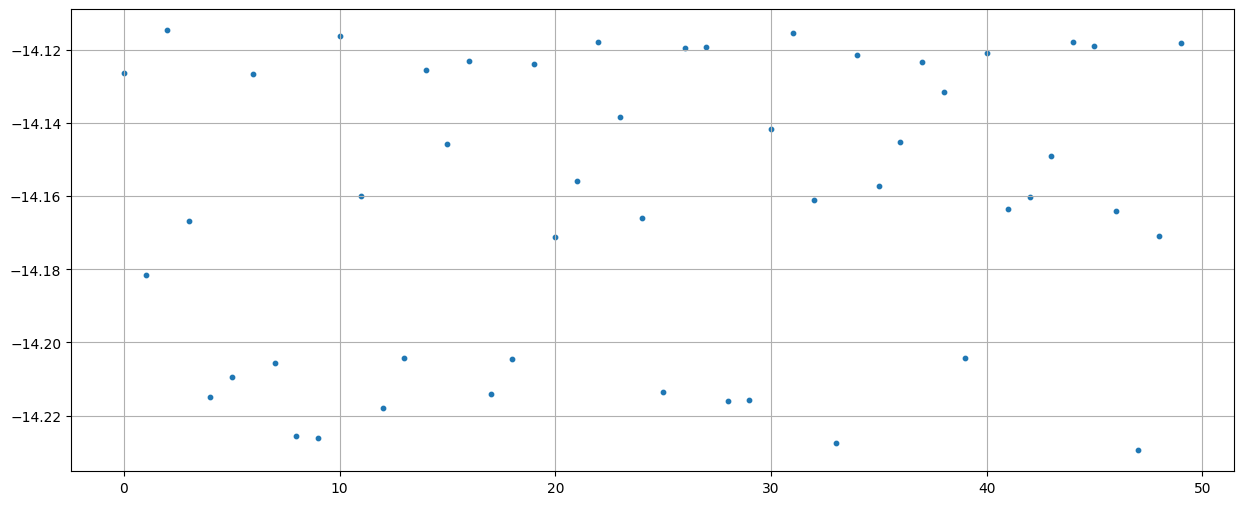

0.07985713339473424 -14.162155939546658


In [806]:
b_list = []
for i in range(len(list_change) - 1):
    left = list_change[i]
    right = list_change[i + 1]
    list_combinations = list(combinations(range(left + 1, right + 1), 2)) 
    list_combinations = [list(x) for x in list_combinations]
    random.shuffle(list_combinations)
    list_solution = []
    n = 100
    N = min(n, len(list_combinations))
    print(N)
    for j in range(N):
        list_solution.append(solution_c(list_combinations[j], i))
    list_solution = np.array(list(filter(lambda item: item is not None, list_solution)))
    b_solution = pd.DataFrame(list_solution)
    b_solution = b_solution[(b_solution.iloc[:, 0] > 0)]
    b_solution['Cluster'] = IsolationForest(n_estimators=1000, contamination=0.5).fit_predict(standard(b_solution))
    b_solution = b_solution[b_solution['Cluster'] == 1]
    b_solution.pop('Cluster')
    plots(b_solution)
    b_list.append(b_solution.mean()[0])
    print(b_solution.mean()[0], b_solution.mean()[1])

[0.04107576661265698, 0.07985713339473424]


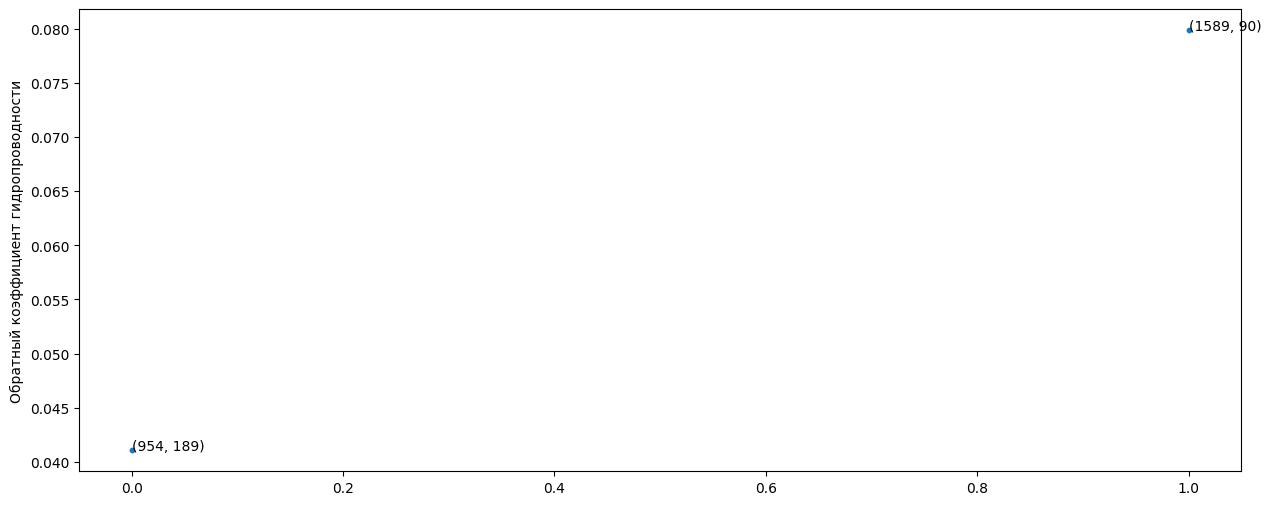

In [808]:
b_list_1 = b_list.copy()
k = list(range(len(b_list_1)))
gf_list_1 = [int(i) for i in gf_list]
qн_list_1 = [int(i) for i in qн_list]
q_list_1 = [int(i) for i in q_list]
plt.scatter(k, b_list_1, s=10)
plt.ylabel('Обратный коэффициент гидропроводности')
for i in range(len(b_list_1)):
    plt.annotate((gf_list_1[i], qн_list_1[i]), (k[i], b_list_1[i]))

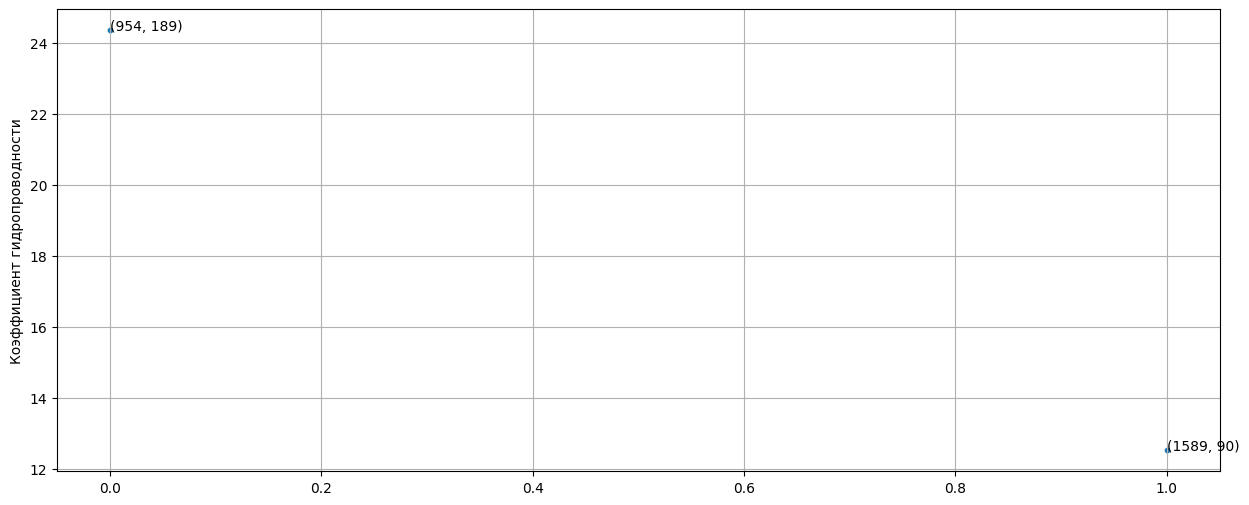

In [809]:
b_list_1 = [1/x for x in b_list_1]
b_list_1_time = [b_list_1[i] for i in range(len(list_change) - 1) for j in range(list_change[i], list_change[i + 1])]
plt.scatter(k, b_list_1, s=10)
plt.ylabel('Коэффициент гидропроводности')
plt.grid()
for i in range(len(b_list_1)):
    plt.annotate((gf_list_1[i], qн_list_1[i]), (k[i], b_list_1[i]))

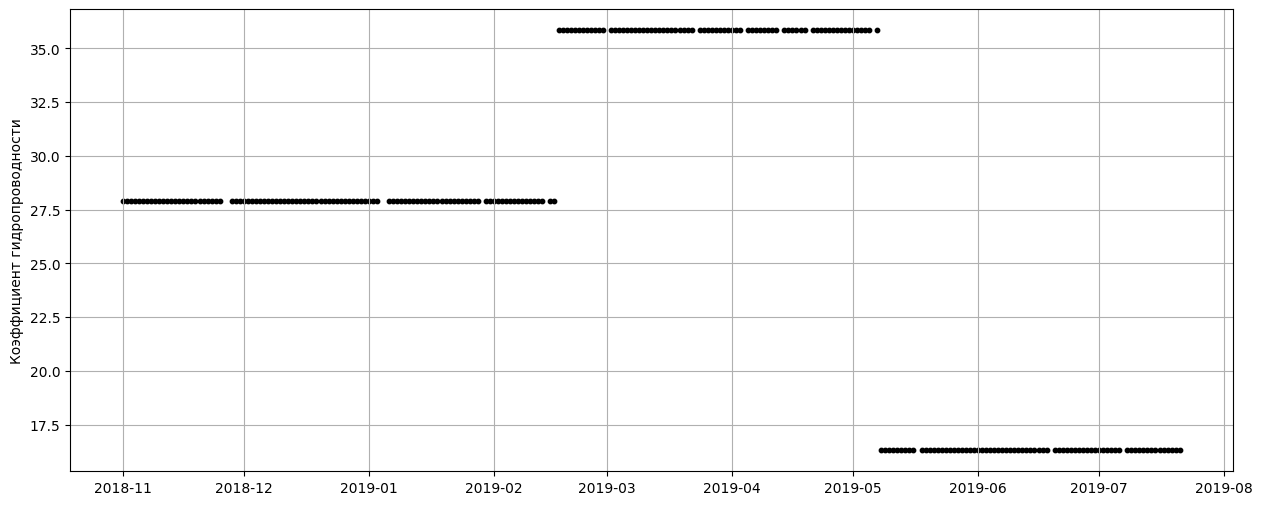

In [754]:
plt.scatter(df.index.tolist()[:-1], b_list_1_time, s=10, color='black')
plt.ylabel('Коэффициент гидропроводности')
plt.grid()

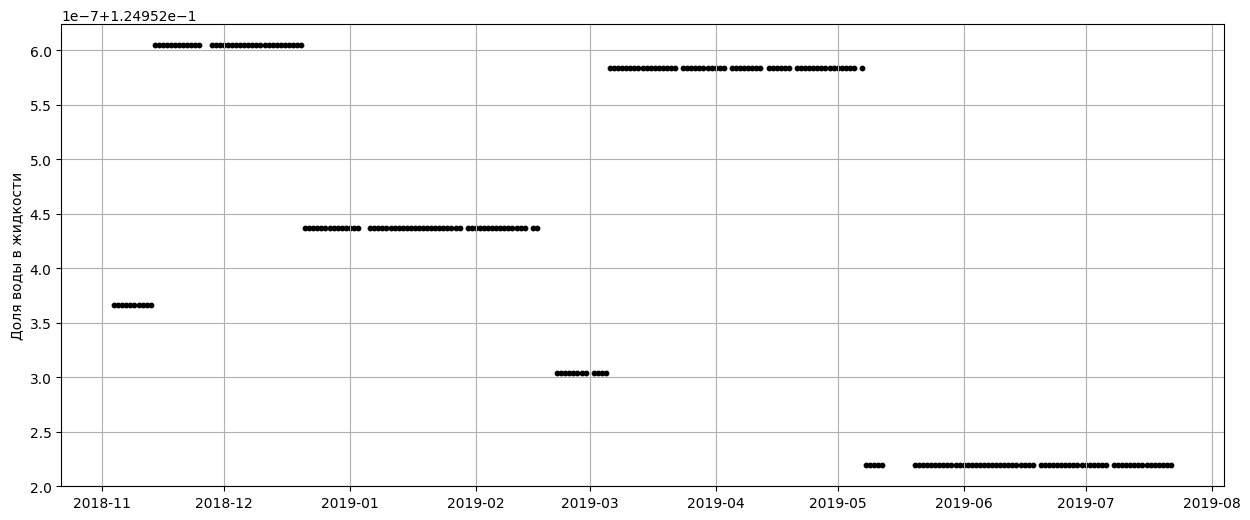

In [810]:
plt.scatter(df.index.tolist(), water, s=10, color='black',)
plt.ylabel('Доля воды в жидкости')
plt.grid()

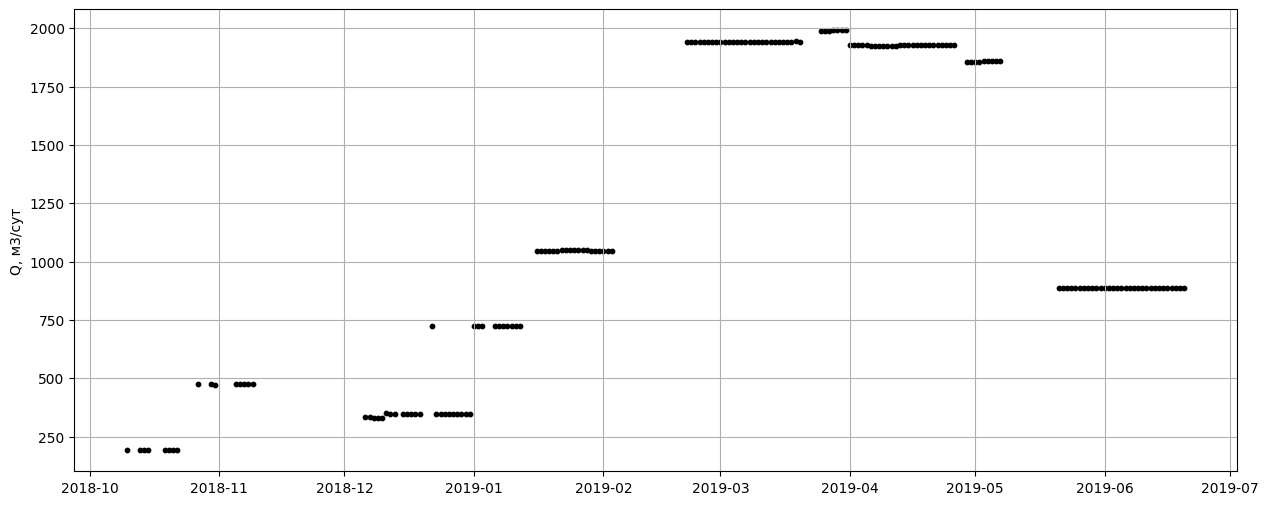

In [553]:
plt.scatter(df.index.tolist(), Qнвг, s=10, color='black')
plt.ylabel('Q, м3/сут')
plt.grid()